# Non-Zero Prior Mean for Gaussian Process Regression

Often users simply use a GP prior with zero mean. The model formulation is simple and meets most use cases. However, it can be useful to set a non-zero prior mean. This notebook walks through the use of squidward to fit a Gaussian process with a non-zero prior mean. I intentionally use a very informative prior over the covariance of each GP below to highlight the difference between the informative prior mean and the zero prior mean.

## Setting Up An Example Problem

In [1]:
# model with Squidward
from squidward.kernels import distance, kernel_base
from squidward import gpr, validation

# useful visualization functions
import gp_viz

# generate example data
import numpy as np

# plot example data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# generate noisy samples for dataset
samples = 10

# train data
x_train = np.random.uniform(0,15,samples)
noise = np.random.normal(0,250,samples)
y_train = 200 * x_train + noise

# test data
x_test = np.random.uniform(0,15,samples)
noise = np.random.normal(0,250,samples)
y_test = 200 * x_test + noise

# generate noiseless data to plot true mean
x_true = np.linspace(0,15,1000)
y_true = 200 * x_true

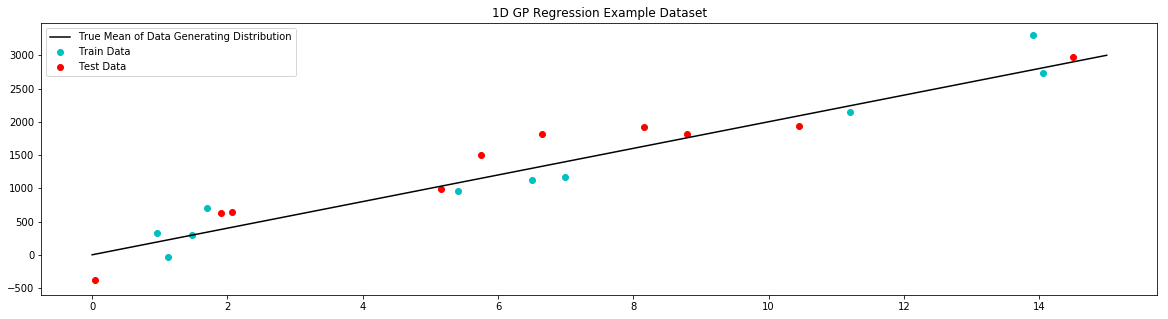

In [3]:
# plot example dataset
plt.figure(figsize=(20,5))
plt.title('1D GP Regression Example Dataset')
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution', c='k')
plt.legend()
plt.show()

## Fit Model with Zero Mean

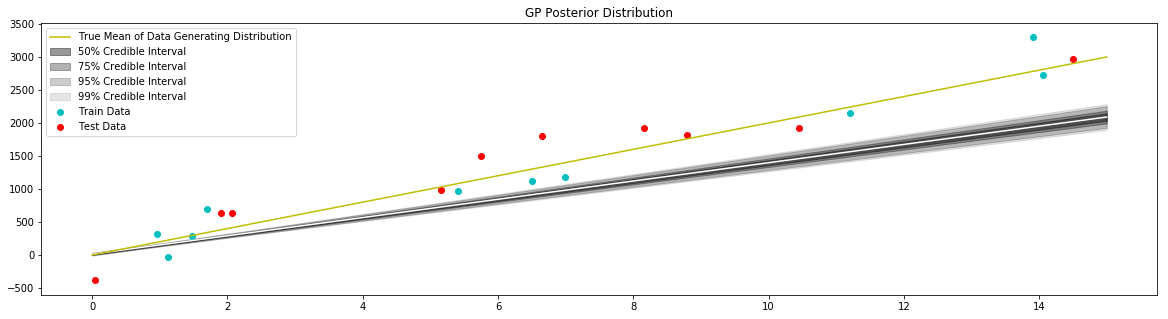

In [13]:
d = distance.Linear(0.0, 10**2, 10**2)
kernel = kernel_base.Kernel(d, 'k1')
model = gpr.GaussianProcessInversion(kernel=kernel, var_l=172**2, show_warnings=False)
model.fit(x_train, y_train)

# generate data to plot posterior of model
x = np.linspace(0,15,100)

# pull the parameters of the posterior distribution
mean, var = model.posterior_predict(x)

# plot posterior of model
plt.figure(figsize=(20,5))
plt.title("GP Posterior Distribution")
gp_viz.regression.plot_1d(x,mean,var[:,0])
plt.scatter(x_train,y_train,label='Train Data', c='c')
plt.scatter(x_test,y_test,label='Test Data', c='r')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution', c='y')
plt.legend()
plt.show()

## Fit Model with Non-Zero Mean

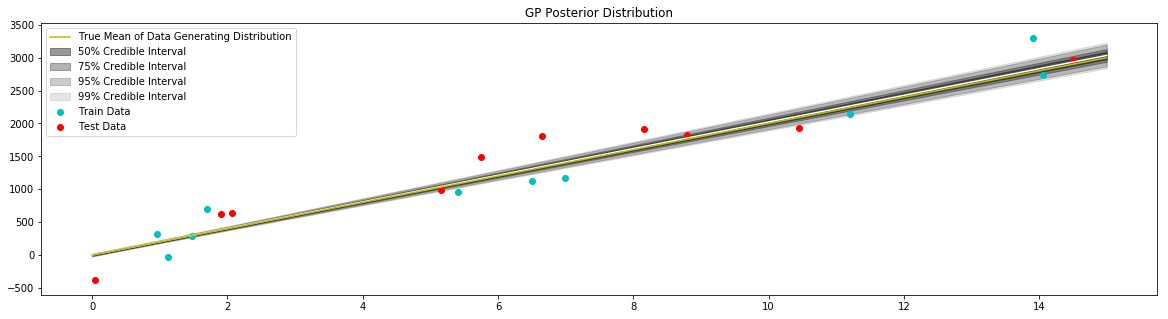

In [14]:
def prior_mean(x):
    return 200.0*x

d = distance.Linear(0.0, 10**2, 10**2)
kernel = kernel_base.Kernel(d, 'k1')
model = gpr.GaussianProcessInversion(kernel=kernel, prior_mean=prior_mean, var_l=172**2, show_warnings=False)
model.fit(x_train, y_train)

# generate data to plot posterior of model
x = np.linspace(0,15,100)

# pull the parameters of the posterior distribution
mean, var = model.posterior_predict(x)

# plot posterior of model
plt.figure(figsize=(20,5))
plt.title("GP Posterior Distribution")
gp_viz.regression.plot_1d(x, mean, var[:,0])
plt.scatter(x_train, y_train, label='Train Data', c='c')
plt.scatter(x_test, y_test, label='Test Data', c='r')
plt.plot(x_true,y_true,label='True Mean of Data Generating Distribution', c='y')
plt.legend()
plt.show()